__Importing Libraries to use:__

In [103]:
#import libraries
import pandas as pd
import numpy as np
%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sns
from missing_data import get_missing_fr_data
from fr_data_clean import cols_to_use, tidy_data

__Importing & Cleaning fertility rate data__

* Data downloaded from https://data.worldbank.org/indicator/SP.DYN.TFRT.IN

In [104]:
#name of columns to select which ones to import
names = ['CountryName','CountryCode']
names.extend(list(map(lambda x: str(x), list(range(1960,2018)))))

In [105]:
#import fertility rate data
df = pd.read_csv('data/API_SP.DYN.TFRT.IN_DS2_en_csv_v2_41035.csv', 
                 header = 2, 
                 usecols= cols_to_use(63,[2,3,62]),
                 names=names)

__Cleaning FR data__

In [106]:
#melting dataframe to change into a tidy dataset
countries_fr = tidy_data(df)

In [107]:
countries_fr.head()

,CountryName,CountryCode,Year,FR
0,Aruba,ABW,1960,4.820
1,Afghanistan,AFG,1960,7.450
2,Angola,AGO,1960,7.478
3,Albania,ALB,1960,6.489
4,Andorra,AND,1960,NaN


In [108]:
countries_fr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15312 entries, 0 to 15311
Data columns (total 4 columns):
CountryName    15312 non-null object
CountryCode    15312 non-null object
Year           15312 non-null object
FR             14016 non-null float64
dtypes: float64(1), object(3)
memory usage: 478.6+ KB


In [109]:
#Changing Year data type from object
countries_fr['Year'] = pd.to_datetime(countries_fr.Year, format='%Y').dt.year

In [110]:
#World Data
world_fr = countries_fr.loc[countries_fr['CountryName']=='World']
world_fr.head()

,CountryName,CountryCode,Year,FR
257,World,WLD,1960,4.983509
521,World,WLD,1961,5.011111
785,World,WLD,1962,5.035931
1049,World,WLD,1963,5.057331
1313,World,WLD,1964,5.067376


__Import other Country data__

In [111]:
#import region and income data
country_details = pd.read_csv('data/Metadata_Country_API_SP.DYN.TFRT.IN_DS2_en_csv_v2_41035.csv' , 
                      header = 0,
                      usecols = [0,1,2], 
                      names = ['CountryCode','Region','IncomeGroup'])

In [112]:
country_details.head()

,CountryCode,Region,IncomeGroup
0,ABW,Latin America & Caribbean,High income
1,AFG,South Asia,Low income
2,AGO,Sub-Saharan Africa,Lower middle income
3,ALB,Europe & Central Asia,Upper middle income
4,AND,Europe & Central Asia,High income


In [114]:
# dropping non-country records
country_details = country_details.dropna(axis = 0, how ='any') 

In [115]:
countries = country_details.CountryCode.tolist()

In [116]:
countries_fr = countries_fr.loc[countries_fr.CountryCode.isin(countries)]

# __Data Analysis__

### __Reviewing Missing Data__ 

To be considered a complete data set, each country must have non null entries (one per year)
* Expected = 215 countries by 58 years = 12470

In [119]:
#getting list of countries with missing values
missing_data = get_missing_fr_data(countries_fr)
missing_data

1238  records are missing
That is  9.84 % of the total data


,Country,MissingValues,perc_missing
0,ASM,58,100.00
1,CYM,58,100.00
2,MCO,58,100.00
3,GIB,58,100.00
4,MNP,58,100.00
5,NRU,58,100.00
6,TCA,58,100.00
7,VGB,58,100.00
8,TUV,58,100.00
9,SMR,57,98.28


In [69]:
#Get list of countries with no data
no_data = missing_data.loc[missing_data['perc_missing']==100,['Country']]['Country'].tolist()
no_data

['ASM', 'CYM', 'MCO', 'GIB', 'MNP', 'NRU', 'TCA', 'VGB', 'TUV']

In [120]:
#Remove countries with no data 
countries_fr = countries_fr.loc[~countries_fr['CountryCode'].isin(no_data)]
countries_fr.shape

(12064, 4)

In [71]:
#Get list of countries with partial data
partial_data = missing_data.loc[missing_data['perc_missing']<100,['Country']]['Country'].tolist()

In [72]:
#Get record count for each coutry with partial data between 2007 and 2017
partial_df  = countries_fr.loc[(countries_fr['CountryCode'].isin(partial_data)) &\
                 (countries_fr['Year'].between(2007,2017, inclusive = True)) & \
                  (countries_fr['FR']>0)].sort_values(['CountryCode','Year'], ascending=True  )

In [73]:
partial_df.CountryCode.value_counts()

PSE    11
FRO    11
SYC    11
GRL    11
CUW    11
MAF    11
XKX    11
BMU    11
LIE    11
SRB    11
LUX    11
SXM     4
AND     4
MHL     2
PLW     2
SMR     1
Name: CountryCode, dtype: int64

In [74]:
#Remove countries with less than ten years of data
countries_fr = countries_fr.loc[~countries_fr['CountryCode'].isin(['SXM','AND','MHL','PLW','SMR'])]
countries_fr.shape

(11774, 4)

In [75]:
len(countries_fr.CountryCode.unique())

203

__Plotting data__

In [76]:
#get maximun worldwide FR value
FR_Max = world_fr.FR.max()
FR_Max_Yr = world_fr.loc[world_fr['FR']==FR_Max,['Year']]['Year'].tolist()

In [77]:
#get minimun worldwide FR value
FR_Min = world_fr.FR.min()
FR_Min_Yr = world_fr.loc[world_fr['FR']==FR_Min,['Year']]['Year'].tolist()

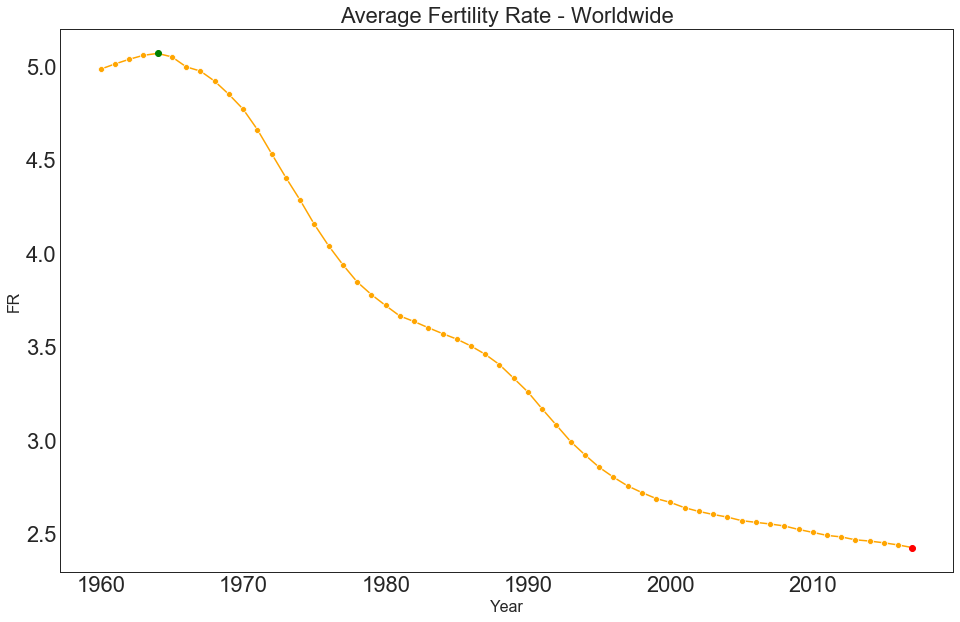

''

In [78]:
#Plot fertility rate for the world

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'xtick.labelsize': large,
          'ytick.labelsize': large,
          'figure.titlesize': large}

plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

wld_fr_data = sns.lineplot(x='Year',
                         y="FR",
                         data=world_fr,
                         color = 'orange',
                         markers=True,
                         marker="o"
                        
                         ).set_title('Average Fertility Rate - Worldwide')


plt.plot(FR_Max_Yr, FR_Max, 'o', color='green')
plt.plot(FR_Min_Yr, FR_Min, 'o', color='red')


plt.savefig('World_FR.png')
plt.show()

;

In [79]:
#get top 15 fr values for 2017
highest_fr = countries_fr.loc[countries_fr.Year == 2017].sort_values('FR', ascending = False).head(15)
highest_fr

,CountryName,CountryCode,Year,FR
15219,Niger,NER,2017,7.184
15259,Somalia,SOM,2017,6.171
15089,"Congo, Dem. Rep.",COD,2017,6.018
15204,Mali,MLI,2017,5.968
15275,Chad,TCD,2017,5.846
15050,Angola,AGO,2017,5.623
15062,Burundi,BDI,2017,5.615
15293,Uganda,UGA,2017,5.500
15220,Nigeria,NGA,2017,5.457
15283,Timor-Leste,TLS,2017,5.391


In [80]:
#get lowest 15 FR values for 2017
lowest_fr = countries_fr.loc[countries_fr.Year == 2017].sort_values('FR', ascending = True).head(15)
lowest_fr

,CountryName,CountryCode,Year,FR
15172,"Korea, Rep.",KOR,2017,1.052
15238,Puerto Rico,PRI,2017,1.101
15142,"Hong Kong SAR, China",HKG,2017,1.125
15254,Singapore,SGP,2017,1.160
15196,Moldova,MDA,2017,1.234
15192,"Macao SAR, China",MAC,2017,1.338
15099,Cyprus,CYP,2017,1.338
15162,Italy,ITA,2017,1.340
15116,Spain,ESP,2017,1.340
15240,Portugal,PRT,2017,1.360


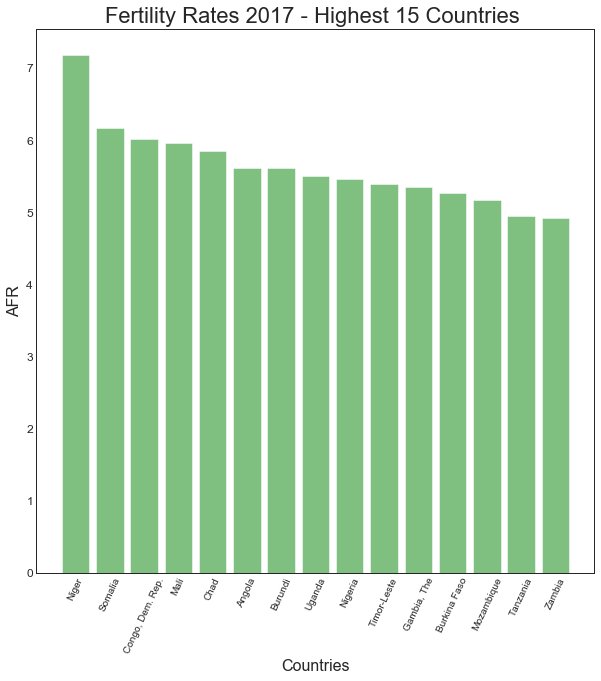

In [81]:
#Plot countries with highest FR in 2017
plt.figure(figsize=(10, 10)) 
plt.bar(highest_fr.CountryName, highest_fr.FR, align='center', alpha=0.5 , color = 'green')
plt.xticks(highest_fr.CountryName ,rotation=65, size='medium')
plt.yticks(size= 'large')
plt.ylabel('AFR')
plt.xlabel('Countries')
plt.title('Fertility Rates 2017 - Highest 15 Countries ')
plt.savefig('Top15_.png')
plt.show()

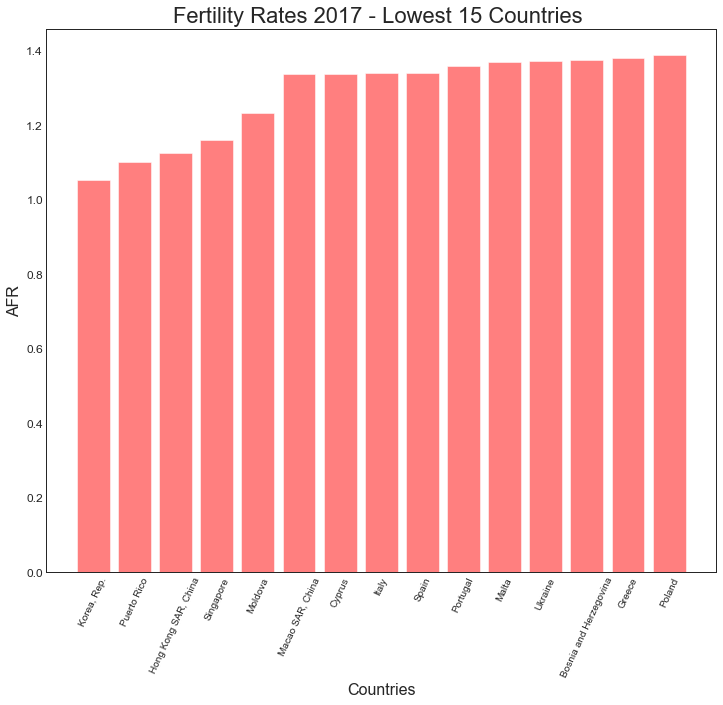

In [82]:
#Plot countries with lowest FR in 2017
plt.figure(figsize=(12, 10) )
plt.bar(lowest_fr.CountryName, lowest_fr.FR, align='center', alpha=0.5, color = "red")
plt.xticks(lowest_fr.CountryName ,rotation=65,size='medium')
plt.yticks(size= 'large')
plt.ylabel('AFR')
plt.xlabel('Countries')
plt.title('Fertility Rates 2017 - Lowest 15 Countries ')
plt.savefig('low10.png')
plt.show()

In [84]:
#get names of top and low 15 countries 
lowest_fr_list = lowest_fr.CountryCode.tolist()
highest_fr_list = highest_fr.CountryCode.tolist()

In [86]:
lowest_data = countries_fr.loc[countries_fr.CountryCode.isin(lowest_fr_list)]


In [87]:
highest_data = countries_fr.loc[countries_fr.CountryCode.isin(highest_fr_list)]

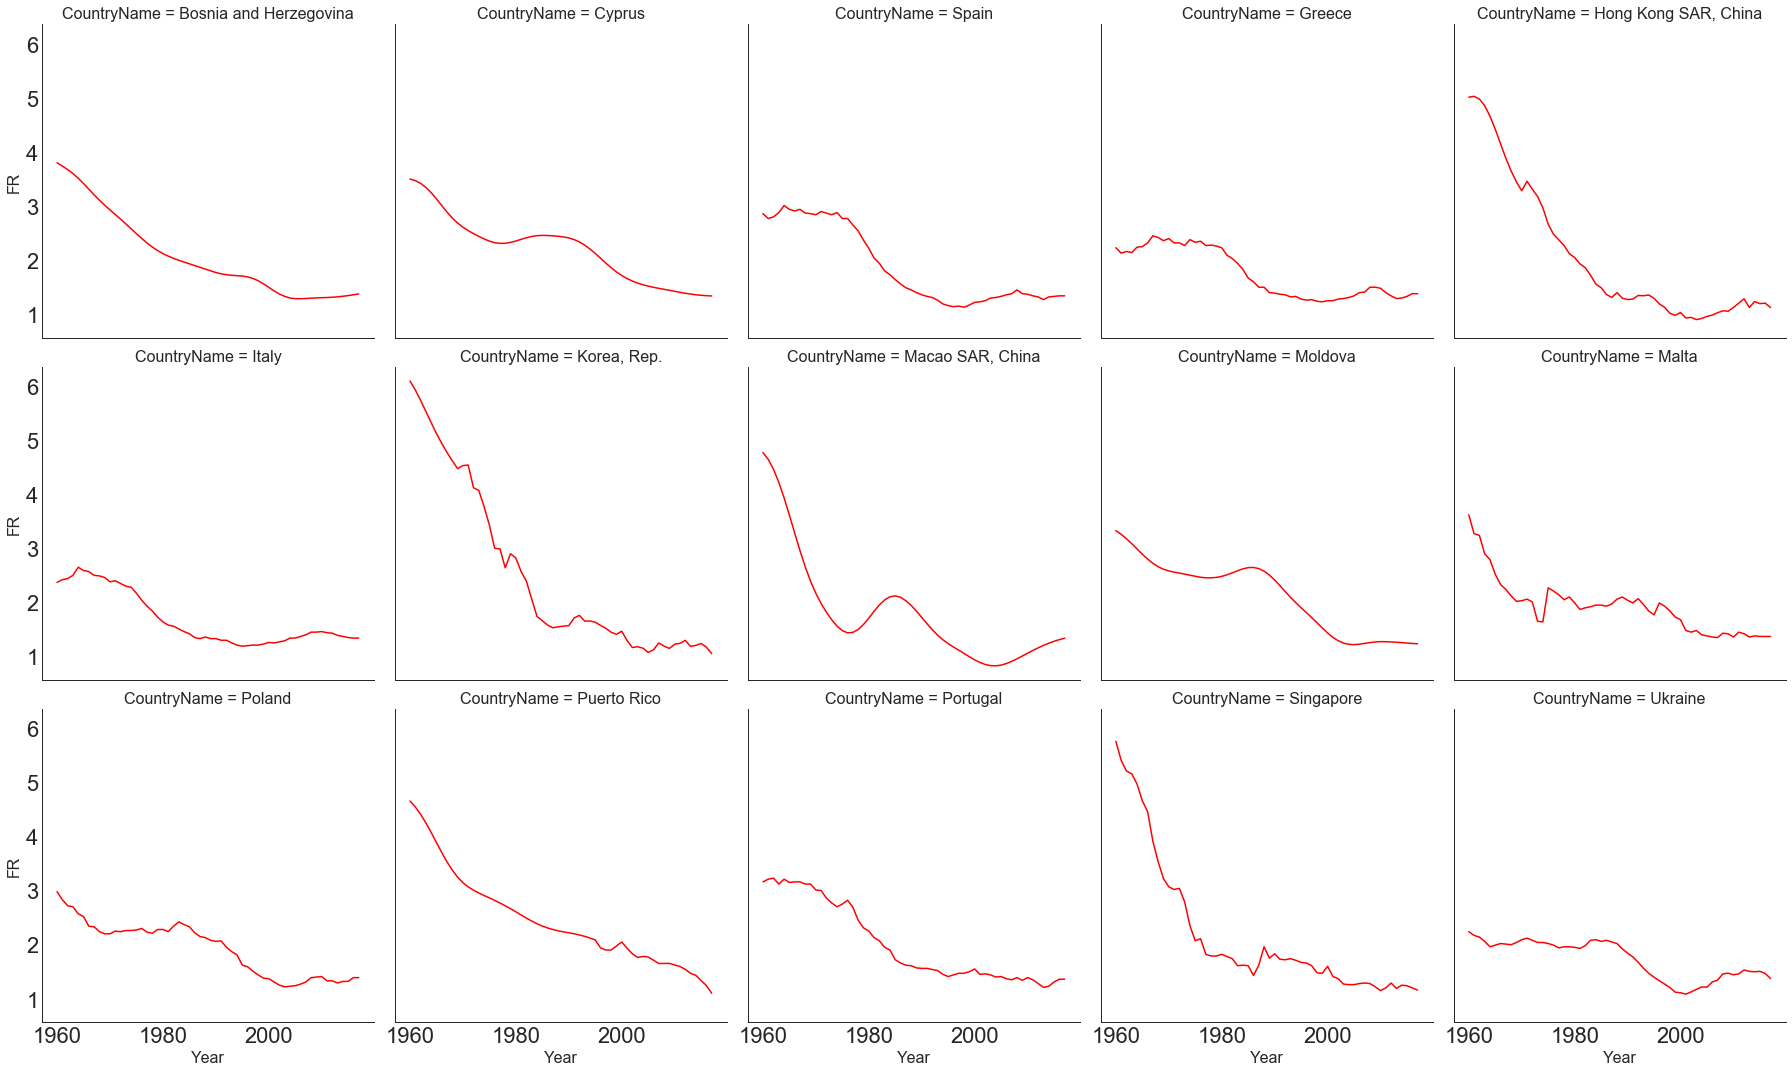

In [88]:
#Plot trend for 15 countries with the lowest FR 
g = sns.FacetGrid(lowest_data, col="CountryName", col_wrap=5, height=5)
g.map(sns.lineplot, "Year", "FR", color="red", ci=None);
g.set_axis_labels("Year", "FR");
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}

plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
plt.savefig('low15.png')
plt.show()

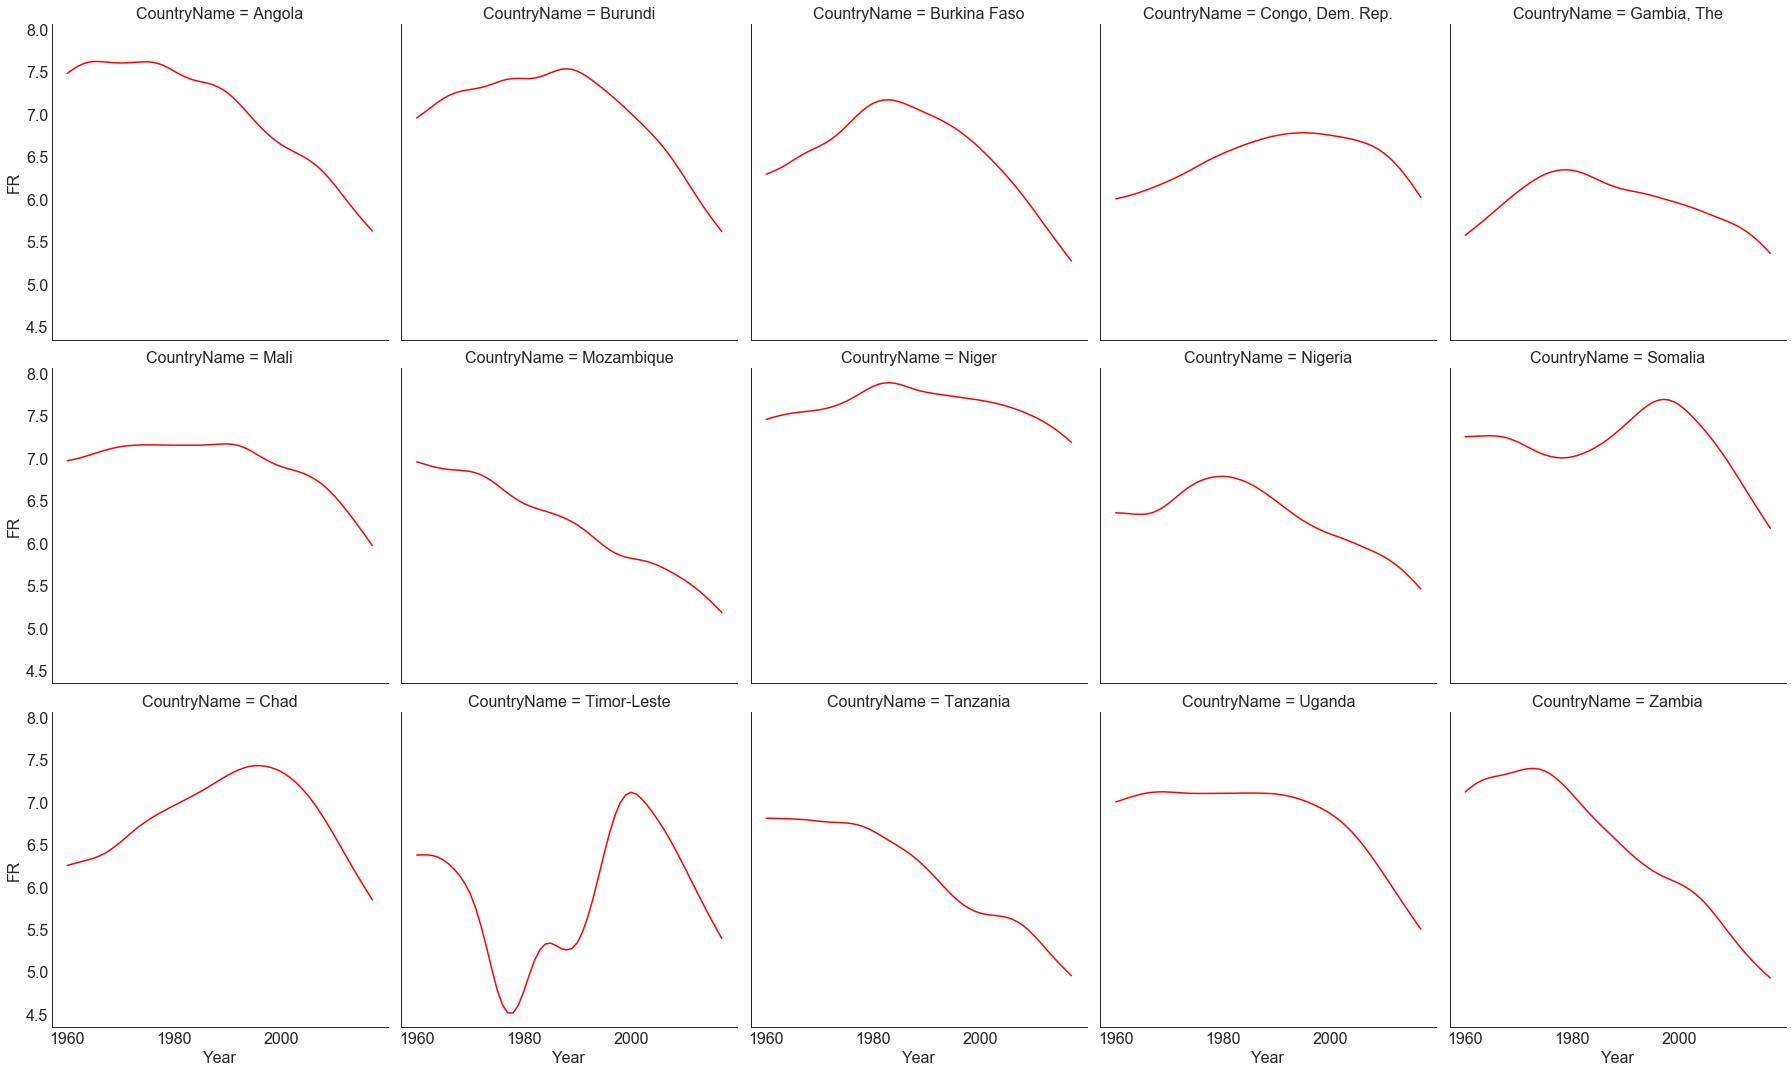

In [320]:
#Plot trend for 15 countries with the highest FR 

g = sns.FacetGrid(highest_data, col="CountryName", col_wrap=5, height=5)
g.map(sns.lineplot, "Year", "FR", color="red", ci=None);
g.set_axis_labels("Year", "FR");
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}

plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
plt.savefig('top_15.png')
plt.show()


In [132]:
#Get 2017 FR for all countries
FR_2017 = countries_fr.loc[countries_fr.Year == 2017].sort_values('FR', ascending = True)
FR_2017 = FR_2017.dropna(axis = 0, how ='any') 

In [133]:
#Plot Map of countries and their FR

import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations = FR_2017['CountryCode'],
    z = FR_2017['FR'],
    text = FR_2017['CountryName'],
    colorscale = 'blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = None,
    colorbar_title = 'Average FR',
))

fig.update_layout(
    title_text='2017 Average Fertility Rate',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.80,
        y=0,
        xref='paper',
        yref='paper',
        text='Data Source:<a href="https://data.worldbank.org/indicator/SP.DYN.TFRT.IN">\
            The World Bank</a>',
        showarrow = False
    )]
)

fig.show();

In [134]:
#Add region and income data to 2017 dataset
FR_2017 = FR_2017.merge(country_details[['CountryCode','Region','IncomeGroup']], 
                        how='inner', left_on='CountryCode', right_on='CountryCode')

In [135]:
FR_2017.drop(columns = ['CountryCode','Year'], inplace = True)

In [136]:
FR_2017.head()

,CountryName,FR,Region,IncomeGroup
0,"Korea, Rep.",1.052,East Asia & Pacific,High income
1,Puerto Rico,1.101,Latin America & Caribbean,High income
2,"Hong Kong SAR, China",1.125,East Asia & Pacific,High income
3,Singapore,1.160,East Asia & Pacific,High income
4,Moldova,1.234,Europe & Central Asia,Lower middle income


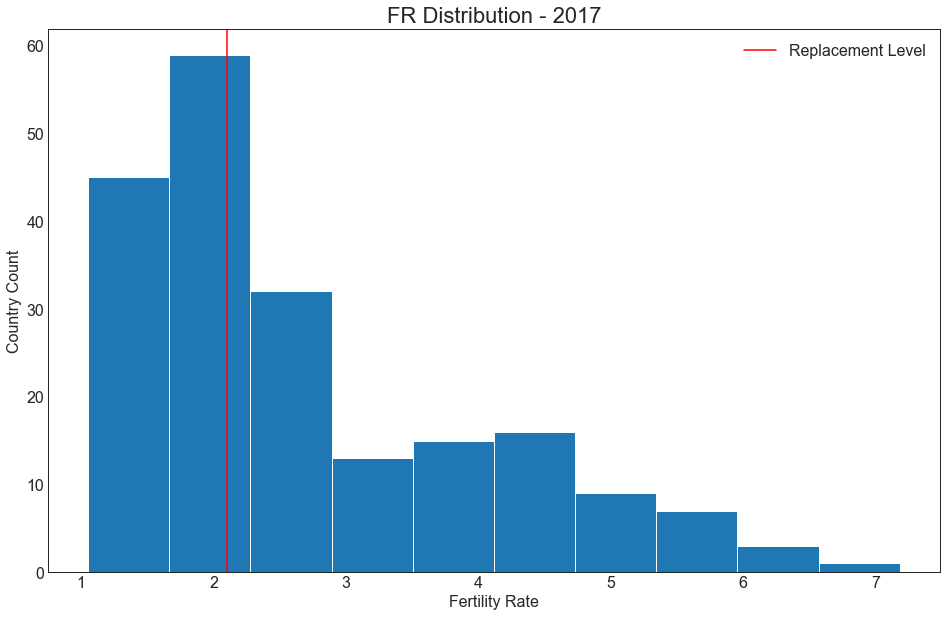

In [96]:
#Plot distribution
plt.hist(FR_2017.FR)
plt.axvline(x=2.1, color = 'red' , label = 'Replacement Level' )
plt.title('FR Distribution - 2017')
plt.xlabel('Fertility Rate')
plt.ylabel('Country Count')
plt.legend()

In [144]:
print(len(FR_2017.loc[FR_2017.FR<=2.1]), 'of', len(FR_2017), 'countries have a Fertility Rate under Replacement Level')

98 of 200 countries have a Fertility Rate under Replacement Level


In [145]:
#FR by region
FR_2017_Region = FR_2017[['Region','FR']].groupby('Region').mean().sort_values('FR', ascending = False)
FR_2017_Region.reset_index(inplace = True)

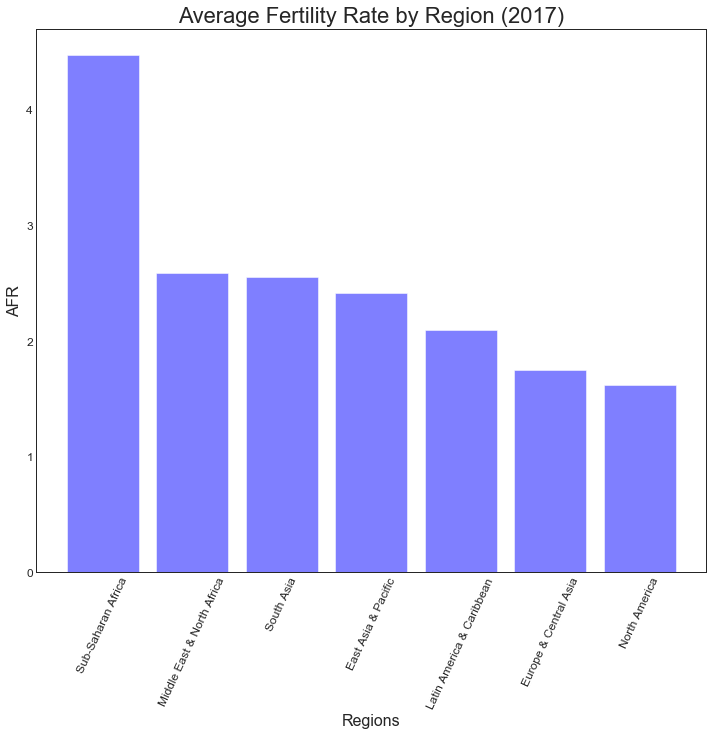

In [146]:
#Plot Fertility rate by region
plt.figure(figsize=(12, 10) )
plt.bar(FR_2017_Region.Region, FR_2017_Region.FR, align='center', alpha=0.5, 
         color = "blue"
       )
plt.xticks(FR_2017_Region.Region ,rotation=65,size='large')
plt.yticks(size= 'large')
plt.ylabel('AFR')
plt.xlabel('Regions')
plt.title('Average Fertility Rate by Region (2017)')
plt.savefig('low10.png')
plt.show()

In [101]:
#FR by income group
FR_2017_Income = FR_2017[['IncomeGroup','FR']].groupby('IncomeGroup').mean().sort_values('FR', ascending = False)
FR_2017_Income.reset_index(inplace = True)

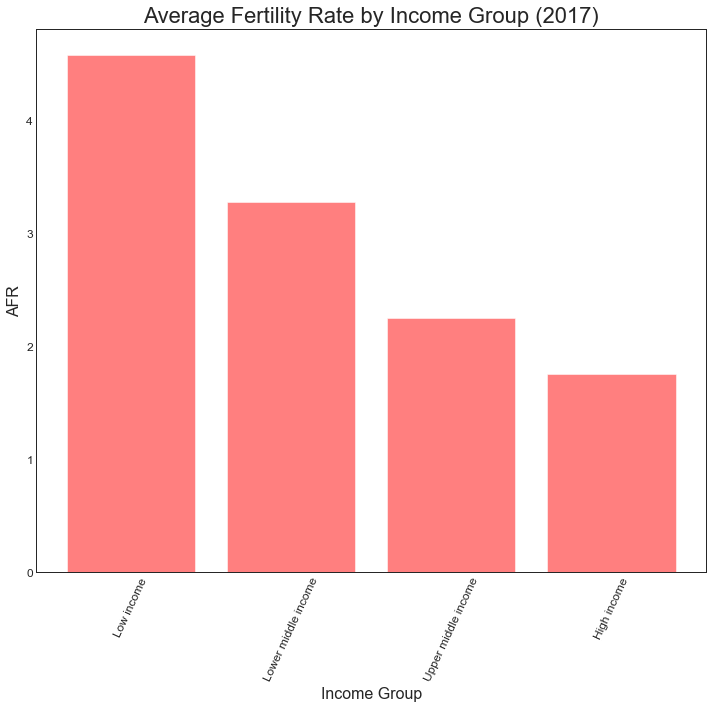

In [147]:
#Plot FR by income group
plt.figure(figsize=(12, 10) )
plt.bar(FR_2017_Income.IncomeGroup, FR_2017_Income.FR, align='center', alpha=0.5, 
         color = "red"
       )
plt.xticks(FR_2017_Income.IncomeGroup ,rotation=65,size='large')
plt.yticks(size= 'large')
plt.ylabel('AFR')
plt.xlabel('Income Group')
plt.title('Average Fertility Rate by Income Group (2017)')
plt.savefig('IncomeGroup.png')
plt.show()